In [3]:
from create_field import *
from field import *

import numpy as np
from matplotlib import pyplot as plt
import cv2
import json
import os

### Функция запуска

Обязательный параметр - путь до директории с конфигом поля

Также можно передать следующие параметры:

1. Тип соседей ('Ring', 'Cross')
2. Максимальное кол-во итераций
3. Ключ для сохранения статистики без самих картинок поля (установить = False для сохранения картинок)
4. Путь до директории сохранения результатов

In [19]:
def run_field(cfg_dir, neighbours_type='Ring', max_iterations=1000, save_only_stat=True, save_direcory='results'):

    with open(os.path.join('configs', 'cfg.json'), 'r') as f:
        cfg = json.load(f)

    grid_size = (cfg['grids_n'], cfg['grids_n'])
    cell_size = cfg['cell_size']
    window_name = cfg['window_name']
    show = cfg['show']
    
    with open(os.path.join(cfg_dir, 'field.json'), 'r') as f:
        grid = np.array(json.load(f))

    with open(os.path.join(cfg_dir, 'opinion_matrix.json'), 'r') as f:
        opinion_matrix = np.array(json.load(f))
    
    if neighbours_type == 'Ring':
        life1 = Ring(
            field=grid,
            shape=grid.shape,
            opinion_matrix=opinion_matrix
            )
    else:
        life1 = Cross( 
            field=grid,
            shape=grid.shape,
            opinion_matrix=opinion_matrix
            )
        
    result_imgs = []
    result_stat = []

    for _ in range(max_iterations):
        life1.life_cycle()
        img = life1.plot(cell_size)
        result_imgs.append(img)
        result_stat.append(life1.calculate_stat())

        if show:
            cv2.namedWindow(window_name)
            cv2.imshow(window_name, img)
            key = cv2.waitKey(0)
            if key == 27:
                break
            
    cv2.destroyAllWindows()
    
    results_path = os.path.join(save_direcory, os.path.basename(cfg_dir) + f'_{neighbours_type}')
    
    if not os.path.exists(results_path):
        os.makedirs(results_path)

    if not save_only_stat:
        imgs_path = os.path.join(results_path, 'imgs')

        if not os.path.exists(imgs_path):
            os.makedirs(imgs_path)

        for i, img in enumerate(result_imgs):
            if i % 10 == 0:
                cv2.imwrite(
                    os.path.join(imgs_path, f'{i}.png'),
                    img
                    )

    with open(os.path.join(results_path, 'stat.json'), 'w') as f:
        json.dump(result_stat, f)
    
    plt.plot(range(len(result_stat)), result_stat)
    plt.title('Доля нулевого мнения')
    plt.savefig(os.path.join(results_path, 'plot.png'))
    
    return result_imgs, result_stat


### выбор конфига и запуск программы

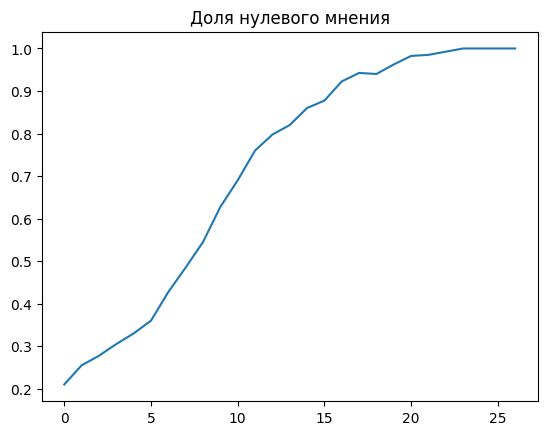

In [22]:
cfg_dir = 'configs/config1'

r_i, r_s = run_field(cfg_dir, neighbours_type='Ring', max_iterations=1000, save_only_stat=False, save_direcory='results2')